# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>
<br/>

# Cores

Neste notebook, iremos fazer algumas operações envolvendo cores.

Primeiro, iremos importar as principais bibliotecas.

In [1]:
import numpy as np
import cv2  
import os
import urllib.request
import matplotlib.pyplot as plt

## Operações com cores

Iremos criar três imagens com cores primárias: uma com todos os pixels vermelhos, outra com os pixels verdes e, por fim, uma com todos os pixels azuis. Como os valores dos pixels podem variar apenas no intervalo [0,255], iremos criar a matriz da imagem no formato **uint8**.

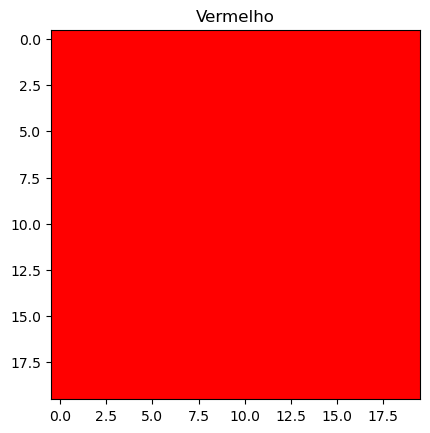

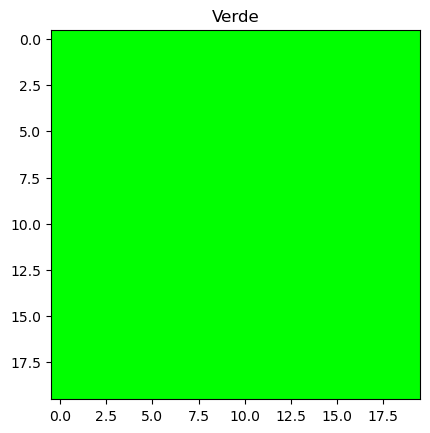

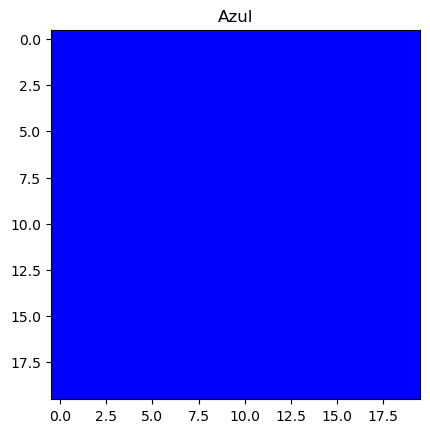

In [2]:
# cria três imagens com todos os pixels tendo valor 0
red = np.zeros([20,20,3], dtype=np.uint8)
blue = np.zeros([20,20,3], dtype=np.uint8)
green = np.zeros([20,20,3], dtype=np.uint8)

################# COMPLETE O CÓDIGO AQUI  #################
# Altere o canal de cor respectivo de cada variável acima
# 
# Obs: nesse exercício, você não deve passa a cor usando 
#      os três canais de uma vez. Altere apenas um canal em 
#      cada imagem
    
# preenche um terminado canal da imagem com valor 255
# para que fique na cor desejada
red[:,:,0] = 255
green[:,:,1] = 255
blue[:,:,2] = 255

##########################################################
    
# plota a imagem vermelha
plt.imshow(red)
plt.title('Vermelho')
plt.show()

# plota a imagem verde
plt.imshow(green)
plt.title('Verde')
plt.show()

# plota a imagem azul
plt.imshow(blue)
plt.title('Azul')
plt.show()

Para mostrar o processo aditivo de cores, as imagens que possuem cores primárias serão somadas para formar imagens com cores secundárias.

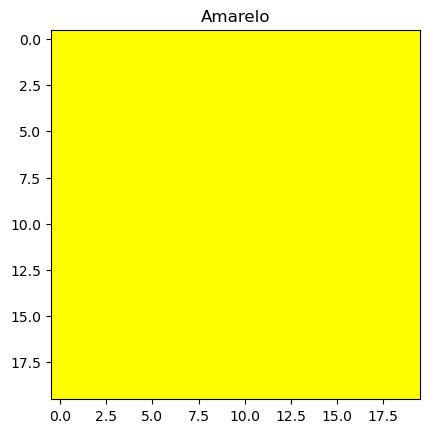

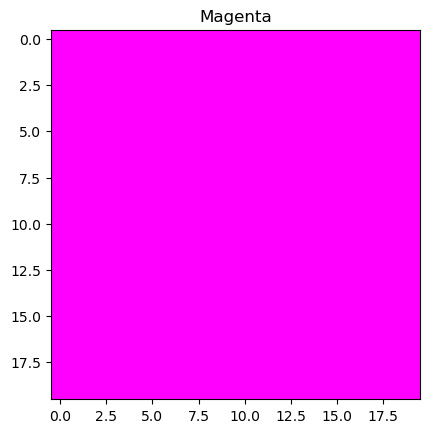

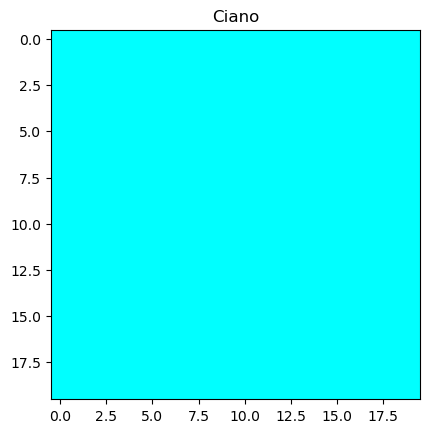

In [3]:
################# COMPLETE O CÓDIGO AQUI  #################
# Forme três novas imagens chamadas yellow, magenta e cyan
# a partir das imagens green, blue e red criadas anteriormente 

# soma as cores primárias para formar cores secundárias
yellow = red + green
magenta = red + blue
cyan = green + blue

##########################################################

# plota a imagem amarela
plt.imshow(yellow)
plt.title('Amarelo')
plt.show()

# plota a imagem magenta
plt.imshow(magenta)
plt.title('Magenta')
plt.show()

# plota a imagem ciano
plt.imshow(cyan)
plt.title('Ciano')
plt.show()

Iremos somar as três cores primárias para formar uma imagem com cor branca. 

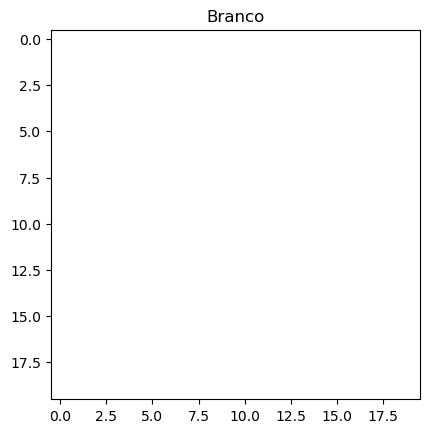

In [4]:
################# COMPLETE O CÓDIGO AQUI  #################
# Forme uma nova imagem chamada white formada a partir das 
# das imagens green, blue e red criadas anteriormente 

# soma todas as cores primárias para formar a cor branca
white = red + green + blue

##########################################################

# plota a imagem branca
plt.imshow(white)
plt.title('Branco')
plt.show()

Outra forma de gerar as cores secundárias é usando a equação de conversão da imagem RGB para CMY.

$$
\begin{bmatrix}
  C \\
  M \\
  Y \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
  1 \\
  1 \\
  1 \\
\end{bmatrix} - % 
%
\begin{bmatrix}
  R \\
  G \\
  B \\
\end{bmatrix} %  
$$

É importante notar que na equação acima é feita a subtração de 1 por um dos canais RGB. Portanto, teremos que normalizar as cores RGB para o intervalor [0,1] ou podemos fazer a subtração usando 255 em vez de 1. No exemplo abaixo, iremos escolher a segunda opção.

Outro ponto importante é que a equação acima não é usada apenas para converter cores primárias em secundárias, mas qualquer cor RGB em cor CMY. Todavia, no exemplo abaixo iremos usá-la para gerar as cores secundárias já que temos certeza que as imagens contém cores primárias.

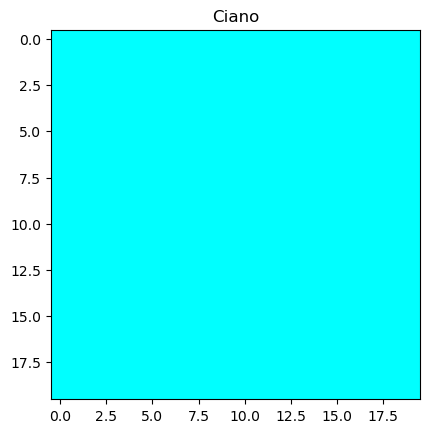

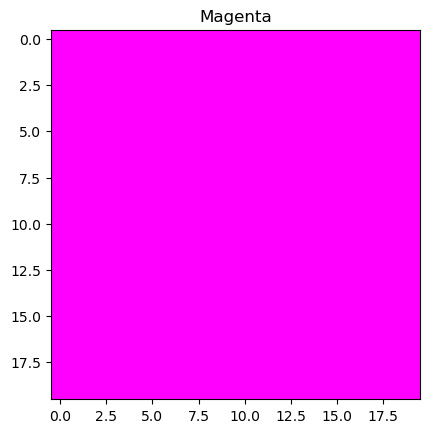

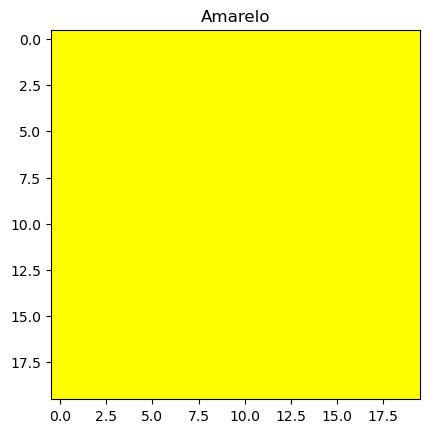

In [5]:
################# COMPLETE O CÓDIGO AQUI  #################
# Forme três novas imagens chamadas yellow2, magenta2 e cyan2
# com base na equação de conversão de RGB para CMY

# converte as imagens com cores secundárias com base na
# equação de conversão de RGB para CMY
cyan2 = 255 - red
magenta2 = 255 - green
yellow2 = 255 - blue

########################################################## 




# plota a imagem ciano
plt.imshow(cyan2)
plt.title('Ciano')
plt.show()

# plota a imagem magenta
plt.imshow(magenta2)
plt.title('Magenta')
plt.show()

# plota a imagem amarela
plt.imshow(yellow2)
plt.title('Amarelo')
plt.show()

# Criando imagens com operação matricial

Iremos criar pixels para as cores vermelha, branca e azul. E depois usá-los para desenhar a bandeira da França.

Primeiro, iremos criar os pixels RGB e uma imagem branca.

In [6]:
# criando os pixels
bluePixel = [0,0,255]
redPixel = [255,0,0]
whitePixel = [255,255,255]

# inicializa a bandeira com todas as cores brancas
bandeira = np.zeros([30,30,3], dtype=np.uint8)

Iremos usar os pixels para desenhar a bandeixa da França.

(30, 30, 3)


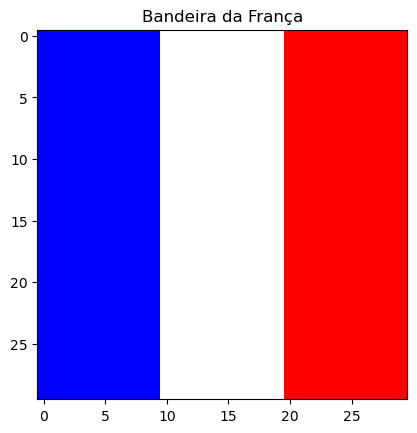

In [7]:
print(bandeira.shape)

bandeira[:,0:10]= bluePixel
bandeira[:,10:20]= whitePixel
bandeira[:,20:] = redPixel

# plota a bandeira
plt.imshow(bandeira)
plt.title('Bandeira da França')
plt.show()

Agora, iremos criar uma imagem onde a primeira diagonal seja vermelha e a segunda seja azul.

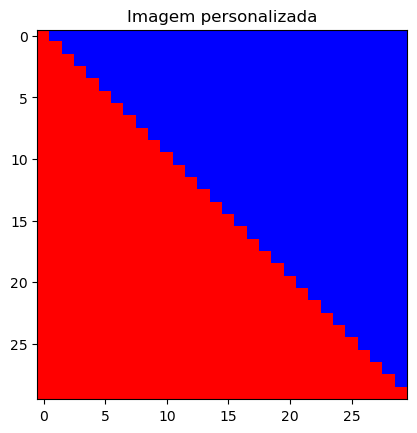

In [8]:
# inicializa uma matriz com valores zero para guardar a imagem
diagonal = np.zeros([30,30,3], dtype=np.uint8)

# percorre as linhas da imagem
for i in range(diagonal.shape[0]):
    
  # percorre as colunas da imagem
  for j in range(diagonal.shape[0]):

    if i<j:
      diagonal[i,j]=bluePixel # preenche o pixel com a cor vermelha
    else:
      diagonal[i,j]=redPixel # preenche o pixel com a cor azul

    
# plota a imagem
plt.imshow(diagonal)
plt.title('Imagem personalizada')
plt.show()

# Separando as cores de imagens RGB

Iremos fazer o download de uma imagem para separar suas cores RGB. 

In [9]:
pathFolder = 'figs/'

# verifica que a pasta existe
if not os.path.exists(pathFolder):
    # cria a pasta
    os.makedirs(pathFolder)

url = 'https://www.clareflorist.co.uk/images/page/burst-mobile.jpg'

urllib.request.urlretrieve(url, pathFolder + "imagem.png")  

('figs/imagem.png', <http.client.HTTPMessage at 0x7fa03ad1a3d0>)

Agora, carregue a imagem baixada anteriormente.

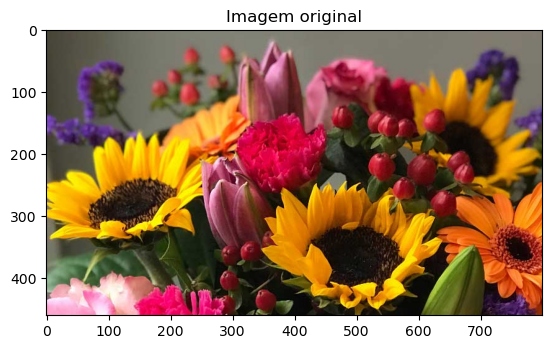

In [10]:
# carrega a imagem
imagem = cv2.imread("figs/imagem.png")

# converte BGR para RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 

plt.imshow(imagem)
plt.title('Imagem original')
plt.show()

Iremos separar os canais de cor da imagem.

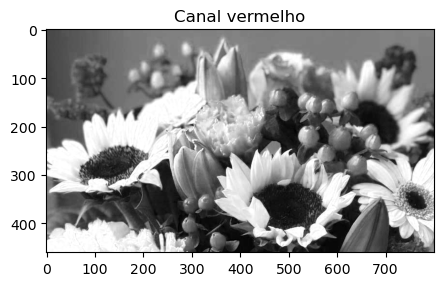

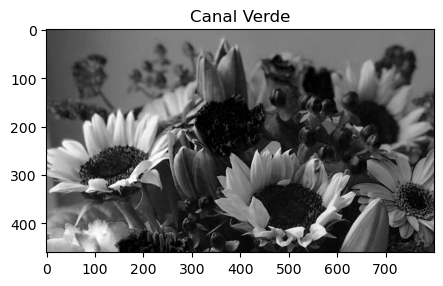

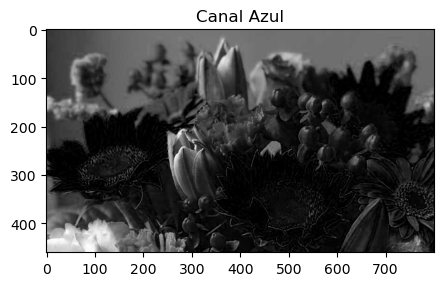

In [11]:
################# COMPLETE O CÓDIGO AQUI  #################
# Use a função split da OpenCV para separar os três canais de cores
# e gere três variáveis imgRed, imgGreen e imgBlue

# separa os canais de cor de uma imagem
imgRed, imgGreen, imgBlue = cv2.split(imagem)

##########################################################

# vamos plotar cada canal de cor usando tons de cinza

plt.figure(figsize=(5,5))
plt.imshow(imgRed, "gray", vmin=0, vmax=255)
plt.title("Canal vermelho")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(imgGreen, "gray", vmin=0, vmax=255)
plt.title("Canal Verde")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(imgBlue, "gray", vmin=0, vmax=255)
plt.title("Canal Azul")
plt.show()


Outra forma de mostrar os canais de cores RGB é mantendo o canal desejado com os valores originais, enquanto seta os demais canais com o valor 0.

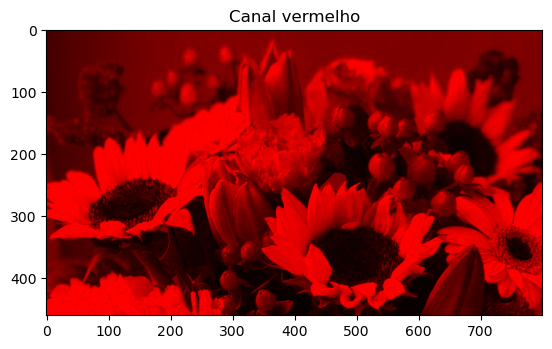

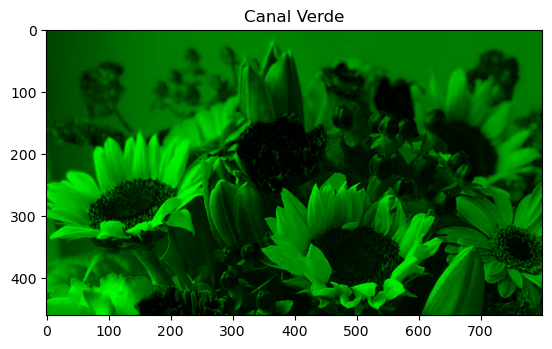

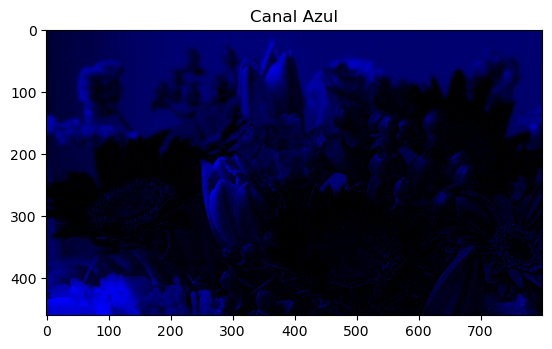

In [12]:
################# COMPLETE O CÓDIGO AQUI  #################
# Crie três imagens novas, uma com cada cor RGB, 
# mantendo o canal desejado com os valores originais, 
# enquanto seta os demais canais com o valor 0.

# separa o canal vermelho
imgRed2 = imagem.copy()
imgRed2[:,:,1] = 0
imgRed2[:,:,2] = 0

# separa o canal verde
imgGreen2 = imagem.copy()
imgGreen2[:,:,0] = 0
imgGreen2[:,:,2] = 0

# separa o canal azul
imgBlue2 = imagem.copy()
imgBlue2[:,:,0] = 0
imgBlue2[:,:,1] = 0

# ======================
# segunda forma de resolver o mesmo problema

imgRed2 = np.zeros( imagem.shape, dtype=np.uint8 )
imgRed2[:,:,0] = imgRed

imgGreen2 = np.zeros( imagem.shape, dtype=np.uint8 )
imgGreen2[:,:,1] = imgGreen

imgBlue2 = np.zeros( imagem.shape, dtype=np.uint8 )
imgBlue2[:,:,2] = imgBlue

##########################################################

plt.imshow(imgRed2)
plt.title("Canal vermelho")
plt.show()

plt.imshow(imgGreen2)
plt.title("Canal Verde")
plt.show()

plt.imshow(imgBlue2)
plt.title("Canal Azul")
plt.show()

Os formatos de cores RGB e CMY não possuem uma propriedade relacionada ao brilho da imagem. Mas, existem alguns formatos, como o YUV e HSV que possuem. Portanto, eles podem ser úteis em aplicações onde é necessário aplicar algum tratamento apenas na propriedade relacionada ao brilho.

Vamos converter a imagem para YUV e separar os canais de cores. 

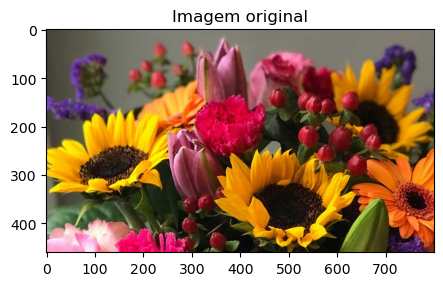

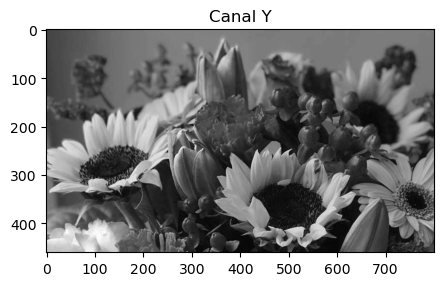

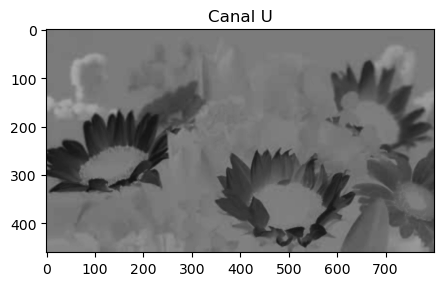

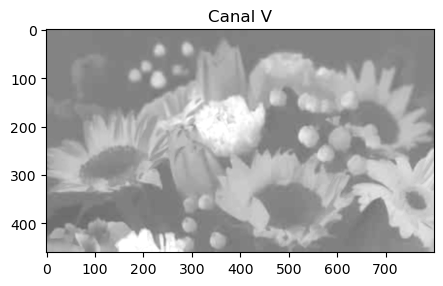

In [13]:
# converte RGB para YUV
imagem2 = cv2.cvtColor(imagem, cv2.COLOR_RGB2YUV) 

################# COMPLETE O CÓDIGO AQUI  #################
# Use a função split da OpenCV para separar os três canais de cores
# e gere três variáveis Yimg, Uimg e Vimg

# separa os canais de cor de uma imagem
Yimg, Uimg, Vimg = cv2.split(imagem2)

##########################################################

# vamos plotar cada canal de cor usando tons de cinza

plt.figure(figsize=(5,5))
plt.imshow(imagem)
plt.title('Imagem original')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(Yimg, "gray", vmin=0, vmax=255)
plt.title("Canal Y")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(Uimg, "gray", vmin=0, vmax=255)
plt.title("Canal U")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(Vimg, "gray", vmin=0, vmax=255)
plt.title("Canal V")
plt.show()

Vamos converter a imagem para HSV e separar os canais de cores. 

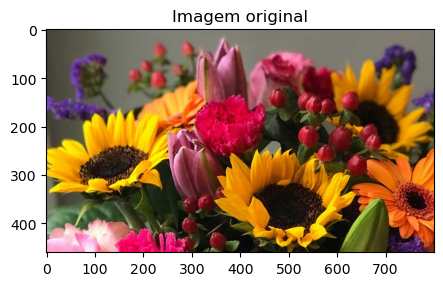

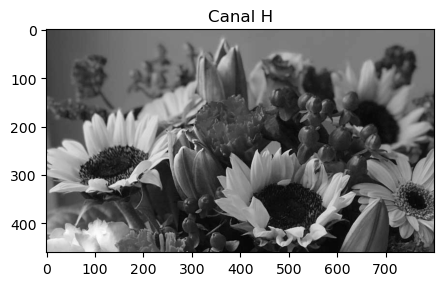

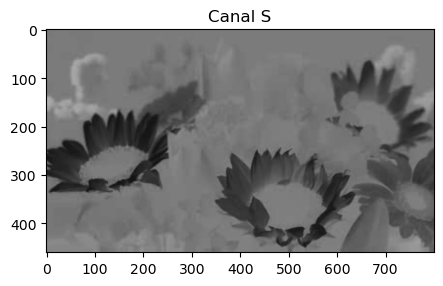

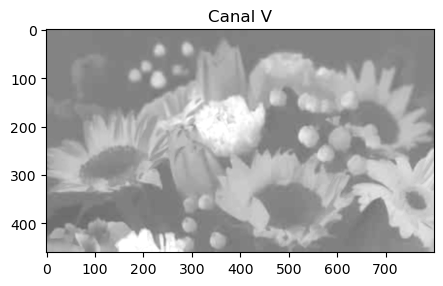

In [14]:
# converte RGB para HSV
imagem3 = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV) 

################# COMPLETE O CÓDIGO AQUI  #################
# Use a função split da OpenCV para separar os três canais de cores
# e gere três variáveis Himg, Simg e Vimg

# separa os canais de cor de uma imagem
Himg, Simg, Vimg = cv2.split(imagem2)

##########################################################

# vamos plotar cada canal de cor usando tons de cinza

plt.figure(figsize=(5,5))
plt.imshow(imagem)
plt.title('Imagem original')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(Himg, "gray", vmin=0, vmax=255)
plt.title("Canal H")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(Simg, "gray", vmin=0, vmax=255)
plt.title("Canal S")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(Vimg, "gray", vmin=0, vmax=255)
plt.title("Canal V")
plt.show()


**Obs.** A biblioteca OpenCV não contém uma função que converte RGB para CMY diretamente. Para isso, precisamos criar uma função manualmente, com base na equação aprendida durante a aula.